In [64]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, log_loss, balanced_accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

In [38]:
# Step 2: Load the datasets
X_train = pd.read_csv('X_Train_Data_Input.csv')
X_test = pd.read_csv('X_Test_Data_Input.csv')
Y_train = pd.read_csv('Y_Train_Data_Target.csv')
Y_test = pd.read_csv('Y_Test_Data_Target.csv')

In [35]:
X_train

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19
0,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,0,0,0,0,0.001351,0.00339,0.0,0,0.0,0
1,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,0,0,0,0,0.001351,0.00339,0.0,0,0.0,0
2,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,1,1,1,1,0.001351,0.00339,0.0,0,0.0,0
3,0.0,211,59.0,-0.288543,-0.577162,-0.007468,-0.407939,-0.015607,-0.774979,0,0,0,0,0.001351,0.00339,0.0,0,1.0,0
4,0.0,718,950.0,-2.028572,-1.855728,-0.007468,-0.407939,-0.015607,-0.774979,0,0,0,0,0.001351,0.00339,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785128,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,0,0,0,0,0.001351,0.00339,0.0,0,1.0,0
785129,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,1,1,1,1,0.001351,0.00339,0.0,0,0.0,0
785130,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,0,0,1,1,0.001351,0.00339,0.0,0,0.0,0
785131,0.0,2480,4493.0,0.001462,0.062121,-0.007468,-0.407939,-0.015607,0.400071,1,1,1,1,0.001351,0.00339,0.0,0,0.0,0


In [36]:
Y_train

,ID,target
0,ad1a67e4cbddc767a3456b0d94299b9e,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0
2,22ba388e7dd14c13342c49e75fc29dda,0
3,59f9b981472d97342587fb3e6392aeb1,1
4,f6317cf7ecf126859804eddff279aead,0
...,...,...
785128,01b7d7be203dbf2a3d75c9770d68dfb6,0
785129,c7993f2c4c15f46f366f6daaa747197d,0
785130,a34b544f113a6d3b4eb353909a378afb,0
785131,fe5b1826c9e7c1864886b233402df330,0


In [39]:
# Step 3: Drop 'Column9' due to high percentage of missing values (>90%)
X_train = X_train.drop(columns=['Column9'])
X_test = X_test.drop(columns=['Column9'])

In [40]:
X_train

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,1.0,0,0,0
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785128,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,1.0,0,0,0
785129,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
785130,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
785131,fe5b1826c9e7c1864886b233402df330,0.0,2480,4493.0,0.001462,0.062121,-0.007468,-0.407939,-0.015607,0.400071,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0


In [43]:
# Step 4: Impute missing values for 'Column0' (Categorical Variable)
# Using 'most_frequent' strategy to fill in the missing values with the most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train['Column0'] = imputer_cat.fit_transform(X_train[['Column0']])
X_test['Column0'] = imputer_cat.transform(X_test[['Column0']])

In [44]:
# Step 5: Define a function to predict missing values in continuous variables using KNeighborsRegressor
# This function predicts missing values for each specified column using columns without missing values
def predict_missing_values(column_name, X_train):
    # Features without missing values used to predict the column with missing values
    features_for_prediction = ['Column1', 'Column2', 'Column7', 'Column17', 'Column18']
    
    # Split the data into available (non-missing) and missing sets
    available_data = X_train.dropna(subset=[column_name])
    missing_data = X_train[X_train[column_name].isna()]
    
    # Define the features (X) and target (y) for training the KNeighborsRegressor
    X = available_data[features_for_prediction]
    y = available_data[column_name]
    
    # Split the data into training and test sets (80% training, 20% testing)
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the KNeighborsRegressor
    regressor = KNeighborsRegressor(n_neighbors=5)
    regressor.fit(X_train_split, y_train_split)
    
    # Calculate RMSE for the prediction
    y_pred_test = regressor.predict(X_test_split)
    rmse = np.sqrt(np.mean((y_test_split - y_pred_test) ** 2))
    print(f"RMSE for predicting {column_name}: {rmse}")
    
    # Predict and fill missing values in the original dataset
    X_missing = missing_data[features_for_prediction]
    predicted_values = regressor.predict(X_missing)
    X_train.loc[X_train[column_name].isna(), column_name] = predicted_values
    
    return X_train

In [45]:
# Step 6: Predict and impute missing values in continuous columns
continuous_columns_with_na = ['Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column14', 'Column15']
for col in continuous_columns_with_na:
    X_train = predict_missing_values(col, X_train)
    X_test = predict_missing_values(col, X_test)

RMSE for predicting Column3: 0.9997017335286067
RMSE for predicting Column3: 1.0023282782175957
RMSE for predicting Column4: 0.9416310946994548
RMSE for predicting Column4: 0.9429713048421318
RMSE for predicting Column5: 0.8479884463416424
RMSE for predicting Column5: 0.5511280213857574
RMSE for predicting Column6: 1.0235547152092028
RMSE for predicting Column6: 1.0508560295952887
RMSE for predicting Column8: 1.1891552650576223
RMSE for predicting Column8: 0.8563982393769333
RMSE for predicting Column14: 0.621987664571346
RMSE for predicting Column14: 0.015036744180482514
RMSE for predicting Column15: 2.803224191262751
RMSE for predicting Column15: 0.22064673193620057


In [46]:
X_train

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,-0.288543,-0.577162,-0.007468,-0.407939,-0.015607,-0.774979,...,0,0,0.001351,0.00339,0.0,0,1.0,0,0,0
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,-0.007468,-0.407939,-0.015607,-0.774979,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785128,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0,0,0.001351,0.00339,0.0,0,1.0,0,0,0
785129,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
785130,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
785131,fe5b1826c9e7c1864886b233402df330,0.0,2480,4493.0,0.001462,0.062121,-0.007468,-0.407939,-0.015607,0.400071,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0


In [47]:
# Step 7: Remove irrelevant columns: 'ID', 'Column20', and 'Column21'
# 'ID' is a unique identifier, and 'Column20' and 'Column21' have low feature importance
X_train = X_train.drop(columns=['ID', 'Column20', 'Column21'])
X_test = X_test.drop(columns=['ID', 'Column20', 'Column21'])

In [48]:
X_train

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19
0,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,0,0,0,0,0.001351,0.00339,0.0,0,0.0,0
1,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,0,0,0,0,0.001351,0.00339,0.0,0,0.0,0
2,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,1,1,1,1,0.001351,0.00339,0.0,0,0.0,0
3,0.0,211,59.0,-0.288543,-0.577162,-0.007468,-0.407939,-0.015607,-0.774979,0,0,0,0,0.001351,0.00339,0.0,0,1.0,0
4,0.0,718,950.0,-2.028572,-1.855728,-0.007468,-0.407939,-0.015607,-0.774979,0,0,0,0,0.001351,0.00339,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785128,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,0,0,0,0,0.001351,0.00339,0.0,0,1.0,0
785129,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,1,1,1,1,0.001351,0.00339,0.0,0,0.0,0
785130,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,0,0,1,1,0.001351,0.00339,0.0,0,0.0,0
785131,0.0,2480,4493.0,0.001462,0.062121,-0.007468,-0.407939,-0.015607,0.400071,1,1,1,1,0.001351,0.00339,0.0,0,0.0,0


In [49]:
# Step 8: Preprocessing - Scaling continuous features and encoding categorical features
# Define the continuous and categorical columns
continuous_columns = ['Column1', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column14', 'Column2', 'Column7', 'Column15']
categorical_columns = ['Column0', 'Column10', 'Column11', 'Column12', 'Column13', 'Column16', 'Column17', 'Column18', 'Column19']

In [50]:
# Create pipelines for preprocessing
# Continuous features: scaling
continuous_transformer = Pipeline(steps=[('scaler', StandardScaler())])
# Categorical features: one-hot encoding
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [51]:
# Combine both transformations into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', continuous_transformer, continuous_columns),
        ('cat', categorical_transformer, categorical_columns)])
    


In [52]:
# Step 9: Define the XGBoost model
# The 'scale_pos_weight' parameter handles the imbalanced target
scale_pos_weight = 711100 / 74033  # (Number of 0s / Number of 1s in the target column)

In [53]:
# Create a pipeline that includes preprocessing and the model
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, scale_pos_weight=scale_pos_weight, random_state=42))])


In [54]:
# Step 10: Train the model
final_target = Y_train['target'].values
xgb_model.fit(X_train, final_target)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Column1', 'Column3',
                                                   'Column4', 'Column5',
                                                   'Column6', 'Column8',
                                                   'Column14', 'Column2',
                                                   'Column7', 'Column15']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Column0', 'Column10',
                                                   'Column11', 'Column12',
                                                   'Column13...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [55]:
# Step 11: Make predictions on the test set
final_test_target = Y_test['target'].values
y_pred_final = xgb_model.predict(X_test)

In [56]:
final_test_target

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
# Step 12: Evaluate the model's performance
# Accuracy
accuracy = accuracy_score(final_test_target, y_pred_final)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9724315277862688


In [58]:
# ROC-AUC Score
roc_auc = roc_auc_score(final_test_target, y_pred_final)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.9827295381929412


In [59]:
# Classification Report
print("Classification Report:")
print(classification_report(final_test_target, y_pred_final))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    237034
           1       0.78      1.00      0.87     24678

    accuracy                           0.97    261712
   macro avg       0.89      0.98      0.93    261712
weighted avg       0.98      0.97      0.97    261712



In [60]:
# Confusion Matrix
conf_matrix = confusion_matrix(final_test_target, y_pred_final)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[229932   7102]
 [   113  24565]]


In [61]:
# Precision, Recall, and F1-Score
precision = precision_score(final_test_target, y_pred_final)
recall = recall_score(final_test_target, y_pred_final)
f1 = f1_score(final_test_target, y_pred_final)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.7757286765402469
Recall: 0.9954210227733203
F1-Score: 0.8719495962374656


In [62]:
# Log Loss
logloss = log_loss(final_test_target, y_pred_final)
print(f"Log Loss: {logloss}")

Log Loss: 0.9936684569392319


In [65]:
# Balanced Accuracy
balanced_acc = balanced_accuracy_score(final_test_target, y_pred_final)
print(f"Balanced Accuracy: {balanced_acc}")

Balanced Accuracy: 0.9827295381929411


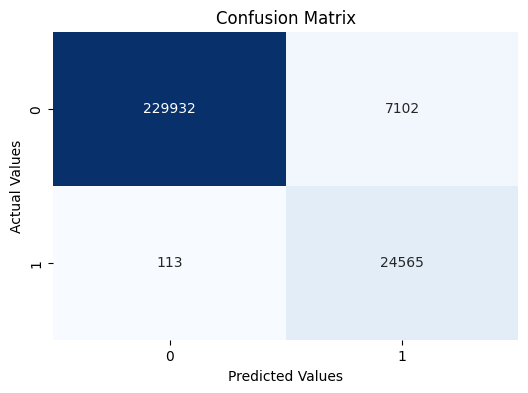

In [66]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

<Figure size 600x400 with 0 Axes>

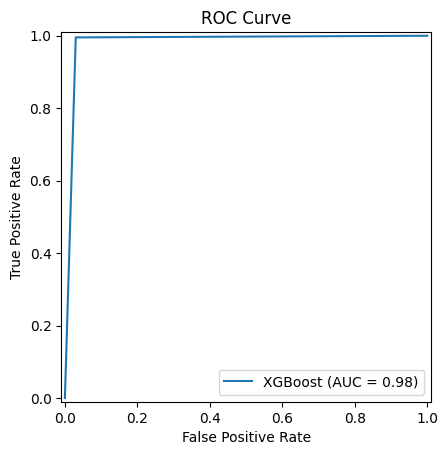

In [67]:
# ROC Curve Visualization
fpr, tpr, _ = roc_curve(final_test_target, y_pred_final)
plt.figure(figsize=(6, 4))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XGBoost').plot()
plt.title('ROC Curve')
plt.show()

<Figure size 600x400 with 0 Axes>

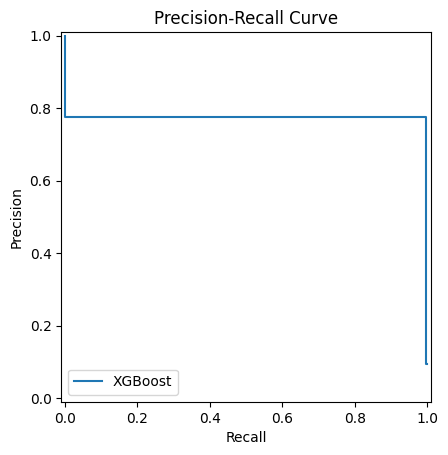

In [68]:
# Precision-Recall Curve Visualization
prec, recall, _ = precision_recall_curve(final_test_target, y_pred_final)
plt.figure(figsize=(6, 4))
PrecisionRecallDisplay(precision=prec, recall=recall, estimator_name='XGBoost').plot()
plt.title('Precision-Recall Curve')
plt.show()